In [1]:
from const import globs
import ipykernel
ipykernel.__version__

D, V, M, k, gamma = globs('l')

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

From now on let's use the following simulated data for further testing

In [3]:
from simulator import Simulator
from samplers import MC_sample_Z, MC_sample_B, MC_sample_H, MC_sample_GK
from transformation_functions import update_Theta, update_Sigma, update_E, update_C
from generator_functions import sample_Z_from_W
from graph_loss import permutation_topics, graph_loss

# 3. MAIN CYCLE TESTS

### Generating Target Data

These data will be used as input (matrix Z and W) and target (matrix G) for our simulation. 

In [4]:
simulated_data = Simulator(D, V, M, k, gamma, seed=1888)
simulated_data.generate_all_data()

Success: Sigma transformed from K
Success: G transformed from K
Success: W and Z generated
Success: E transformed from Z
Success: C transformed from Z


In [5]:
# Input Data:
simulated_data.W

array([[2., 1., 3., ..., 5., 2., 0.],
       [3., 3., 2., ..., 2., 4., 2.],
       [1., 1., 1., ..., 2., 2., 0.],
       ...,
       [0., 2., 0., ..., 1., 0., 1.],
       [2., 2., 0., ..., 2., 1., 3.],
       [2., 1., 0., ..., 1., 2., 3.]])

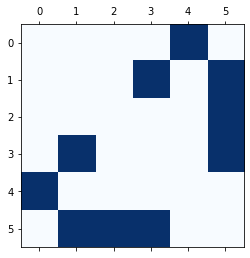

In [6]:
# Target graph
plt.matshow(simulated_data.G, cmap='Blues')

### Generating Initial Data

These are used as our initial guess for Sigma, K, B, Theta and G

Success: G transformed from K
Success: E transformed from Z
Success: C transformed from Z


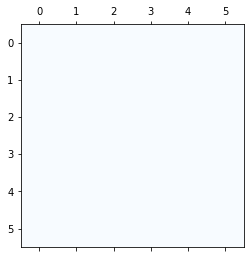

In [7]:
# Initial guesses
initial = Simulator(D, V, M, k, gamma, 2020)
initial.generate_non_informative(simulated_data.W)

# Initial graph
plt.matshow(initial.G, cmap='Blues')

## 3.1 Test graph loss

We use the true versions of the data that isn't related to B, G

In [8]:
%%time
max_iterations = 5000
np.random.seed(25041945)

# Initialization
Sigma = initial.Sigma.copy()
K = np.linalg.inv(Sigma)
B = initial.B.copy()
Theta = initial.Theta.copy()
G = initial.G.copy()

alpha = np.ones(V)  # Uninformative prior
b = k - 1

# Skipping part
Z = initial.Z.copy()
E = initial.E.copy()
C = initial.C.copy()

H = initial.H.copy()
Theta = update_Theta(Theta, H)  # get Theta from H

step = 0.5

# Metrics

Zerrors1 = []

Berrors1 = []
B_converge1 = [] 

waiting_times1 = []
sampled_Gs1 = []
graph_changes1 = []
edges_log1 = []
errors_log1 = []


sampled_Bs = []
permutations = []
waiting_times = []
sampled_Gs = []
graph_losses = []

permutations = []


for iteration in range(max_iterations):
    
    # Step 1
    Z, E, C = MC_sample_Z(Z, simulated_data.W, Theta, B, E, C, debug=True) 
    
    # Step 2
    B = MC_sample_B(alpha, C)
    sampled_Bs.append(B)
    
    permute = permutation_topics(B_true=simulated_data.B, B_sampled=B)
    permutations.append(permute)
    
    #print(permute)
    
    # Step 3
    #H = MC_sample_H(E, Sigma, K, H_current=H, burn_in=10)
    H, step = MC_sample_H(E, Sigma, K, step_size=step, H_current=H, burn_in=15)
    Theta = update_Theta(Theta, H)  # get Theta from H
    
    # Step 4    
    G_old = G.copy()
    wt_sample, G_new, K = MC_sample_GK(G, H, b, debug=False)
    
    G = G_new
    Sigma = np.linalg.inv(K)
    
    waiting_times.append(wt_sample)
    sampled_Gs.append(G.copy())
    
    graph_losss = graph_loss(G_true=simulated_data.G, G_sampled=G, permutation=permute)
    graph_losses.append(graph_losss)
    
    if iteration % 100 == 0:  # Plot every 20 iterations
        print('Finished iteration '+str(iteration))
        #plt.matshow(G, cmap='Blues')
        #plt.suptitle("Graph of iteration " + str(iteration), x=0.5, y=1, ha='center')
        #plt.show()

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
Finished iteration 0
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
[0.0, 1.0, 2.0, 3.

KeyboardInterrupt: 

In [10]:
B_True = simulated_data.B.copy()
B_True_Permuted = B_True.copy()

B_True_Permuted[0] = B_True[1].copy()
B_True_Permuted[1] = B_True[0].copy()

permute = permutation_topics(B_true=B_True, B_sampled=B)
print(permute)

AttributeError: 'numpy.ndarray' object has no attribute 'B'

In [ ]:
graph_loss = pd.Series(graph_losses)

print("Graph loss metrics")
print(graph_loss.describe())

graph_loss.hist(bins=30)
plt.suptitle('G graph loss histogram', x=0.5, y=1, ha='center')
plt.show()

graph_loss.plot(title="Graph loss series")
plt.show()

wait_times = pd.Series(waiting_times)
wait_times.plot(title="Waiting times series")
plt.show()

In [ ]:
import seaborn as sn
fig, ax = plt.subplots(1,1)
sn.heatmap(permutations, cmap='Blues',ax=ax[0])

In [ ]:
plt.scatter(wait_times, graph_loss)
plt.xlabel('Waiting times')
plt.ylabel('Graph losses')
plt.show()